In [2]:
import scanpy as sc
import pandas as pd
import sys
sys.path.append("../")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import echidna as ec
ec.pl.activate_plot_settings()

In [5]:
adata = sc.read_h5ad("/content/drive/MyDrive/Azizi lab/echidna/results/params_mt_refined/samples/R310/X.h5")
wdf = pd.read_csv("/content/drive/MyDrive/Azizi lab/echidna/results/all_cellranger_w.csv").set_index("gene")

In [6]:
wdf = pd.read_csv("/content/drive/MyDrive/Azizi lab/echidna/results/all_cellranger_w.csv").set_index("gene")
wdf = wdf.drop(index='HES4') # drop bad gene
wdf

,Unnamed: 0,F01_pre_count,F01_on_count,F02_pre_count,F02_on_count,F03_post1_pre2_count,F03_post1_on2_count,F04_pre_count,F05_pre_count,F06_post1_pre2_count,...,F31_post_count,R294_on_count,R310_pre_count,R310_on2_count,R319_pre_count,R319_on_count,R328_on_count,R329_on_count,R334_pre_count,R354_pre_count
gene,,,,,,,,,,,,,,,,,,,,,
ISG15,1,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,2.0
AL645608.1,2,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,2.0
AGRN,3,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,2.0
AL645608.5,4,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,2.0
AL645608.8,5,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMC5,34580,NaN,NaN,NaN,NaN,2.0,3.0,1.0,NaN,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,3.0,NaN
AL162390.1,34581,NaN,NaN,NaN,NaN,2.0,3.0,1.0,NaN,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,3.0,NaN
KLF9,34582,NaN,NaN,NaN,NaN,2.0,3.0,1.0,NaN,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,3.0,NaN


In [7]:
wdf = wdf[['R310_pre_count', 'R310_on2_count']]
wdf

,R310_pre_count,R310_on2_count
gene,,
ISG15,2.0,2.0
AL645608.1,2.0,2.0
AGRN,2.0,2.0
AL645608.5,2.0,2.0
AL645608.8,2.0,2.0
...,...,...
SMC5,1.0,1.0
AL162390.1,1.0,1.0
KLF9,1.0,1.0


In [8]:
wdf

,R310_pre_count,R310_on2_count
gene,,
ISG15,2.0,2.0
AL645608.1,2.0,2.0
AGRN,2.0,2.0
AL645608.5,2.0,2.0
AL645608.8,2.0,2.0
...,...,...
SMC5,1.0,1.0
AL162390.1,1.0,1.0
KLF9,1.0,1.0


In [9]:
ec.tl.set_sort_order(
    adata,
    ["pre", "on", "on1", "on2", "post", "post1", "post1_pre2", "post1_on2", "post2"]
)

In [10]:
num_timepoints = 2
num_clusters = len(adata.obs["leiden"].unique())
q_corr_init = 1e-2
q_shape_rate_scaler = 10.0
eta_mean_init = 2.0
lkj_concentration = 1.0

/content/echidna3/echidna/tools/data.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wdf.dropna(inplace=True)
/content/echidna3/echidna/tools/train.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 4 2 ... 3 3 5]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  adata.obs.loc[:,config.clusters] = adata.obs.loc[:,config.clusters].astype(int)
training loss: 0.7867 | validation loss: 0.1328: 100%|██████████| 500/500 [01:22<00:00,  6.04it/s]


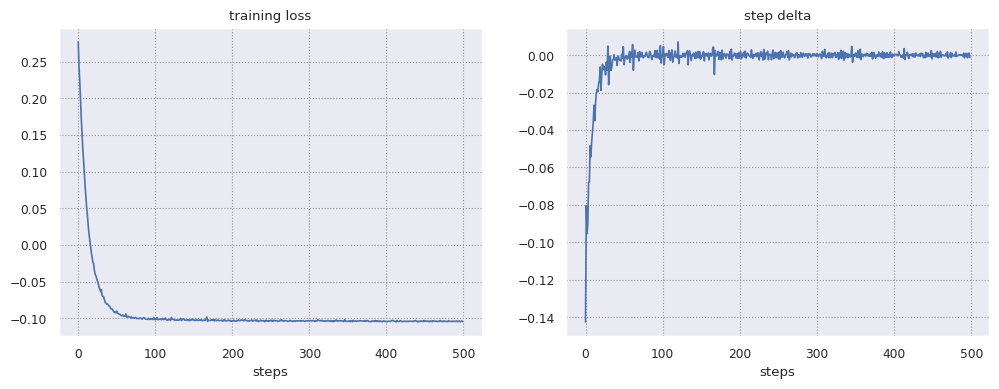

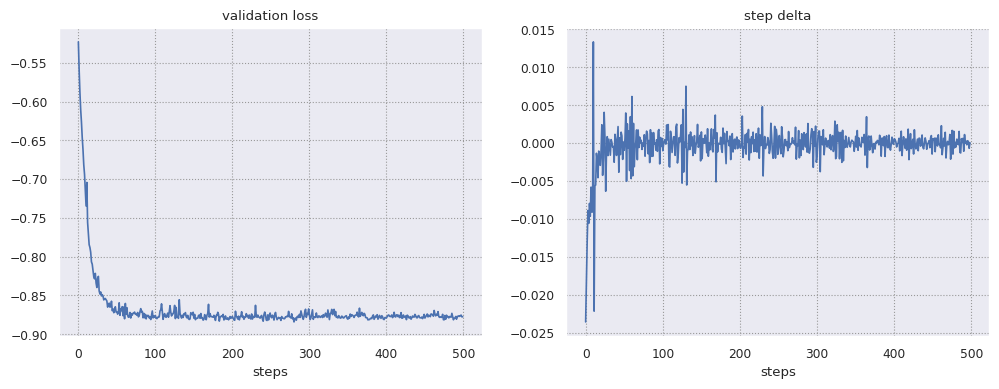

In [11]:
config = ec.tl.EchidnaConfig(
    timepoint_label = "condition",
    counts_layer = "counts",
    clusters = "leiden",
    inverse_gamma = False,
    eta_mean_init = 2.,
    patience = -1,
    learning_rate = .1,
    num_timepoints = num_timepoints,
    num_clusters = num_clusters,
    q_corr_init = q_corr_init,
    q_shape_rate_scaler = q_shape_rate_scaler,
    n_steps=500,
)
ec.tl.echidna_train(
     adata
    , wdf
    , config
)

In [23]:
ec.tl.echidna_clones(adata, method='manual', threshold=0.07)

/content/echidna3/echidna/tools/eval.py:355: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hier_colors = [color_dict.loc[int(i)][0] for i in adata.obs[cluster_label]]


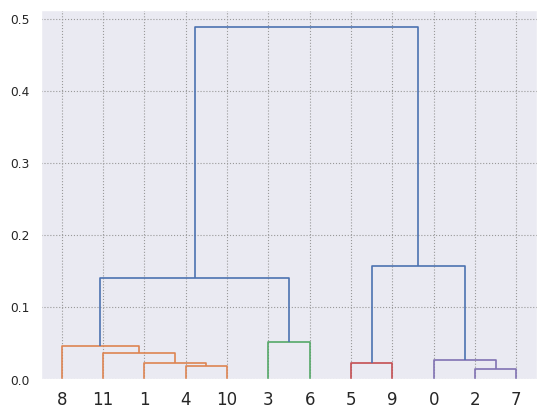

In [24]:
ec.pl.dendrogram(adata)

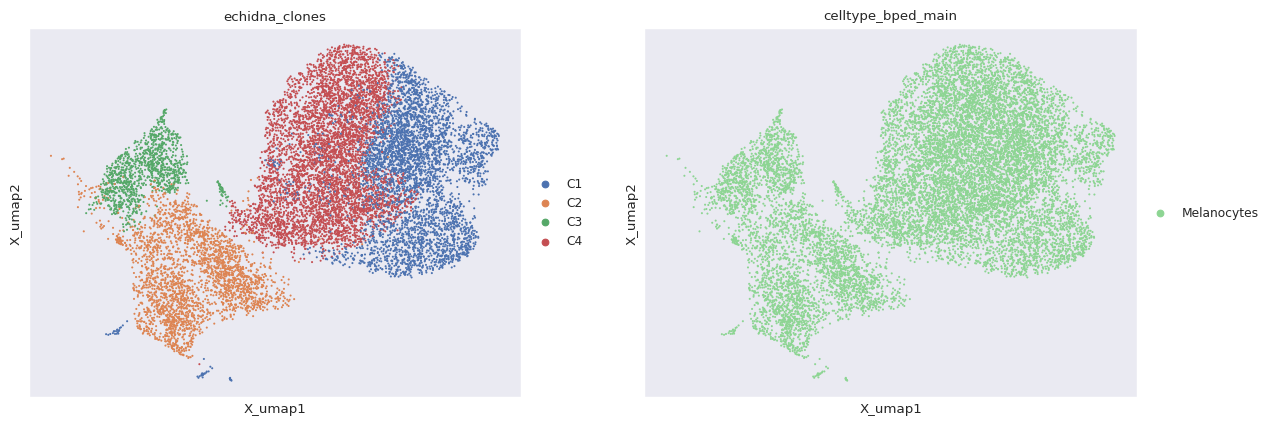

In [25]:
ec.pl.echidna(adata, ["echidna_clones", "celltype_bped_main"])

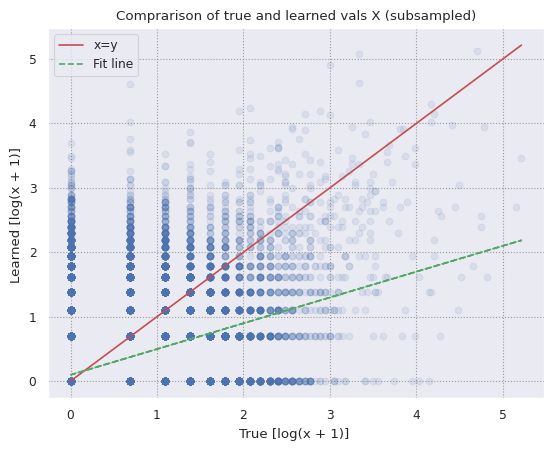

In [26]:
ec.pl.ppc(adata, "X")

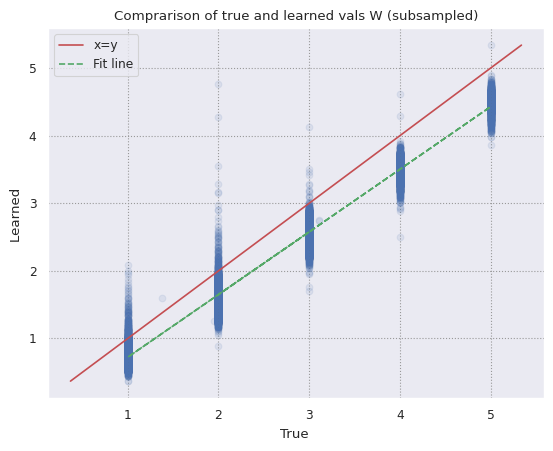

In [27]:
ec.pl.ppc(adata, "W")

training loss: 0.8835 | validation loss: 0.1416: 100%|██████████| 500/500 [01:15<00:00,  6.62it/s]


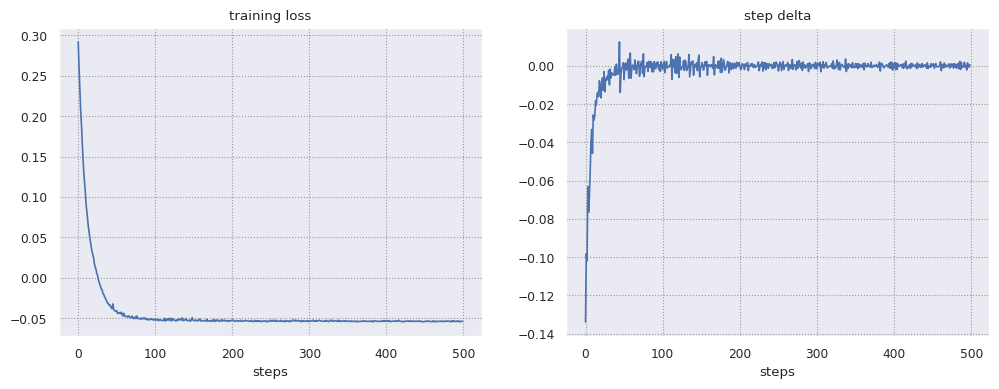

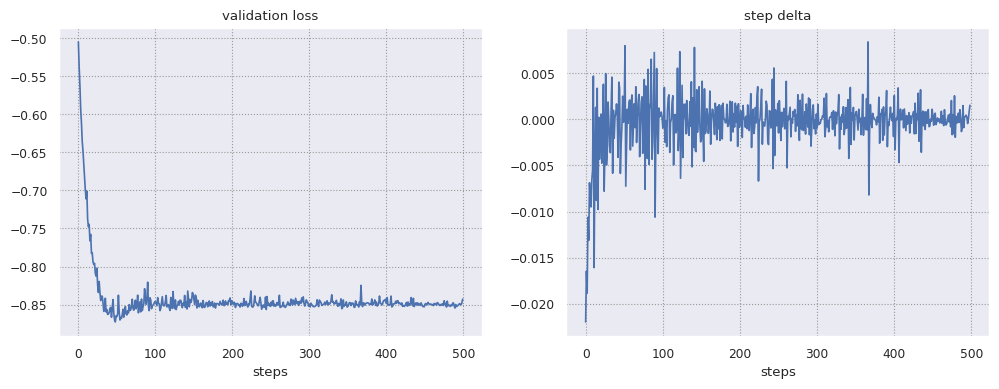

In [28]:
ec.tl.simulate(adata)

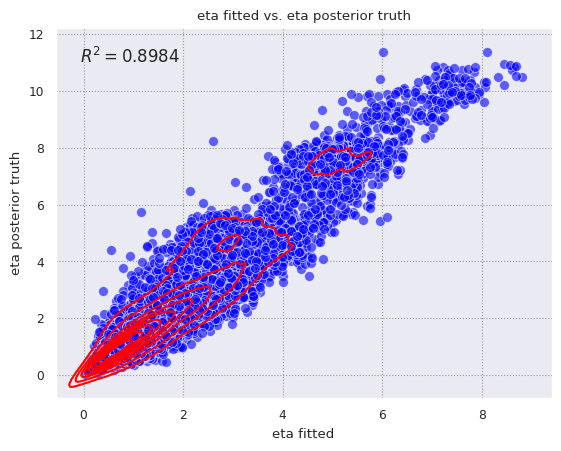

In [29]:
ec.pl.ppc(adata, "eta")

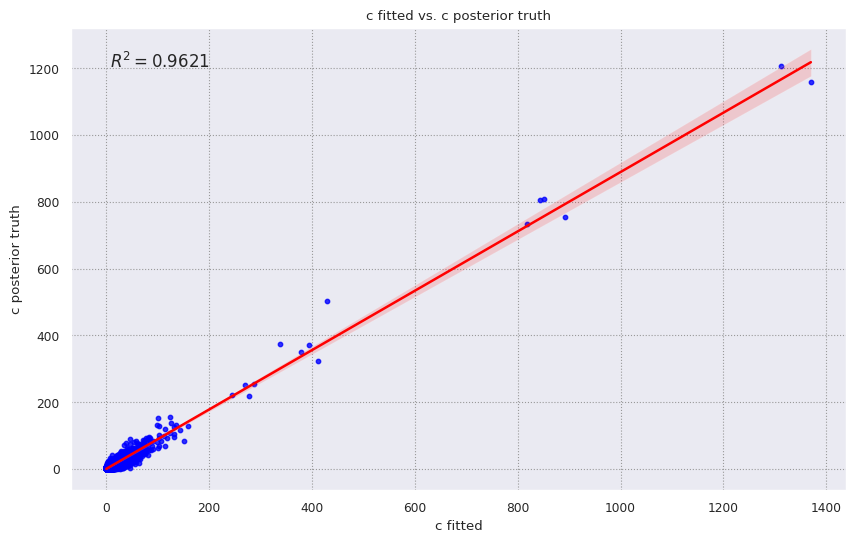

In [30]:
ec.pl.ppc(adata, "c")

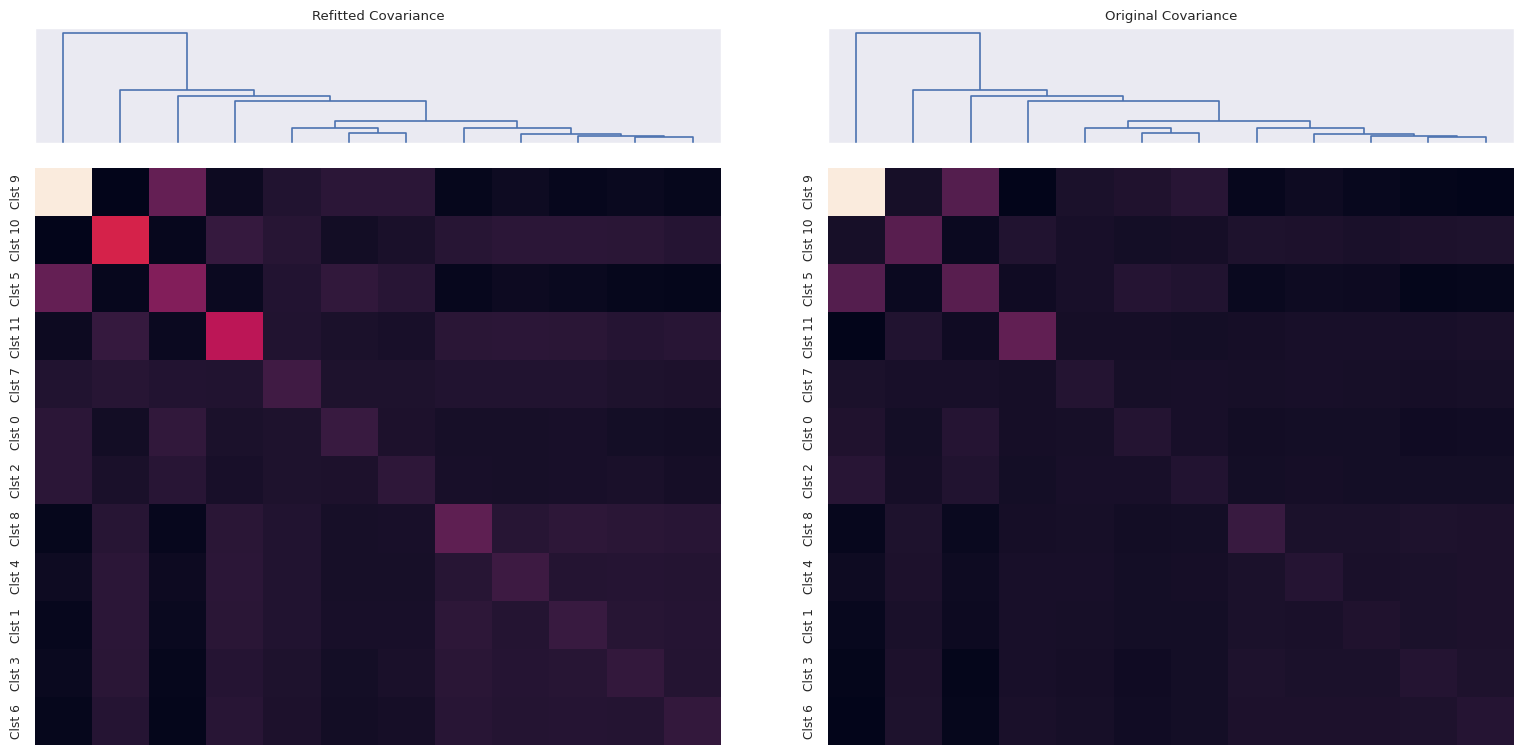

In [45]:
ec.pl.ppc(adata, "cov")